In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from rmgpy.chemkin import loadChemkinFile

In [4]:
chemkin = '/home/alongd/Code/tmp/chem.inp'
dictionary = '/home/alongd/Code/tmp/dictionary.txt'

In [5]:
# Load chemkin file
species, reactions = loadChemkinFile(chemkin, dictionary)

In [9]:
pressure = 1e5 # Pa
#temperature = np.linspace(298, 2000, 20)
temperature = [300.0, 500.0, 600.0, 700.0, 850.0, 1000.0, 1250.0, 1500.0, 1750.0, 2000.0, 2500.0]

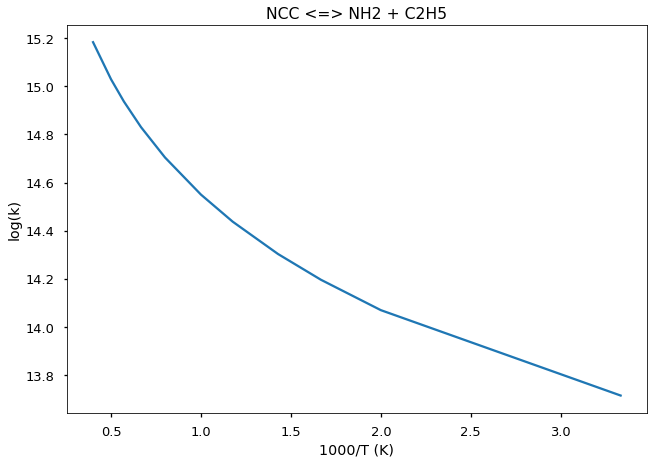

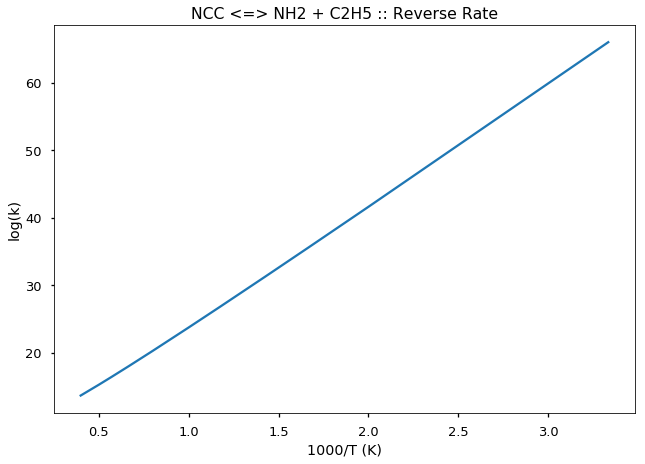

In [15]:
plt.style.use('seaborn-talk')

for reaction in reactions:
    # Get kinetics
    k = []
    for t in temperature:
        k.append(reaction.kinetics.getRateCoefficient(t, pressure))
    
    fig = plt.figure()

    x = [1000 / q for q in temperature]
    y = np.log10(k)
    plt.plot(x, y)

    plt.xlabel('1000/T (K)')
    plt.ylabel('log(k)')
    plt.title(str(reaction))
    
    # Get reverse kinetics
    reverse = reaction.generateReverseRateCoefficient()
    krev = []
    for t in temperature:
        krev.append(reverse.getRateCoefficient(t, pressure))
    
    fig = plt.figure()

    x = [1000 / q for q in temperature]
    y = np.log10(krev)
    plt.plot(x, y)

    plt.xlabel('1000/T (K)')
    plt.ylabel('log(k)')
    plt.title(str(reaction) + ' :: Reverse Rate')
    
#    print krev